### Predictive features selected: exter_qual, kitchen_qual, overall_qual, garage_cars.

These features were selected not only for their high correlation with the sale price variable, but also because research shows making your house more efficient, adding square footage, upgrading the kitchen or bath and installing smart-home technology can help increase its value. Keeping up with repairs and making smart improvements are both proven ways to increase home value over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Get cleaned data

In [2]:
train_d = pd.read_csv('../datasets/train-data-clean-imputed-1.1.csv')

In [3]:
train_d.shape

(1967, 67)

In [4]:
train_d.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,electrical,kitchen_qual,functional,paved_drive,sale_type
0,109,533352170,60,13517,6,8,1976,2005,289.0,533.0,...,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Y,WD
1,544,531379050,60,11492,7,5,1996,1997,132.0,637.0,...,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Y,WD
2,153,535304180,20,7922,5,7,1953,2007,0.0,731.0,...,No,GLQ,Unf,GasA,TA,SBrkr,Gd,Typ,Y,WD
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,No,Unf,Unf,GasA,Gd,SBrkr,TA,Typ,Y,WD
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,...,No,Unf,Unf,GasA,TA,SBrkr,TA,Typ,N,WD


In [5]:
train_d.columns

Index(['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold', 'saleprice', 'ms_zoning', 'lot_shape', 'land_contour',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heatin

## Model developement:

### Matrixes

In [6]:
train_m = train_d[['overall_qual','exter_qual', 'kitchen_qual','garage_cars']].copy()

In [7]:
train_m.head()

,overall_qual,exter_qual,kitchen_qual,garage_cars
0,6,Gd,Gd,2.0
1,7,Gd,Gd,2.0
2,5,TA,Gd,1.0
3,5,TA,TA,2.0
4,6,TA,TA,2.0


In [8]:
X = train_m
y = train_d['saleprice']


In [9]:
# Dummifying categorical variables
X_dummy = pd.get_dummies(X, columns = ['exter_qual', 'kitchen_qual'], drop_first = True)
X_dummy.head()

,overall_qual,garage_cars,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,6,2.0,0,1,0,0,1,0
1,7,2.0,0,1,0,0,1,0
2,5,1.0,0,0,1,0,1,0
3,5,2.0,0,0,1,0,0,1
4,6,2.0,0,0,1,0,0,1


Train/Test split splits the data into a training set (70% in this case) and a testing set (30% of data). This allows you to see how well your model performs on unseen data.

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, train_size=.7, random_state=42)

X_train.head()

,overall_qual,garage_cars,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
1304,6,2.0,0,0,1,0,0,1
774,4,1.0,0,0,1,0,0,1
1814,5,2.0,0,0,1,0,0,1
613,7,2.0,0,1,0,0,1,0
1537,8,2.0,0,1,0,0,1,0


## MLR model:

In [11]:
# Instantiate model
lr = LinearRegression()

Cross validation allows you to see how well your model performs on unseen data several times. This prevents a good or bad score due to randomness from occurring and gives you more evidence on whether your model is good.

In [17]:
# Training Cross Val
cross_val_score(lr, X_train, y_train).mean()

0.7509669938891705

In [18]:
# Testing Cross Val
cross_val_score(lr, X_test, y_test).mean()

0.7154717073991084

In [14]:
# Fit the model on training data
lr.fit(X_train, y_train)

LinearRegression()

R-squared metric is the percentage of the variability in the target that can be explained by the x-variables in the mode. (relative to a model with no predictors)

In [15]:
# Training score (R2)
lr.score(X_train, y_train)

0.7565949026066711

In [16]:
# Testing score (R2)
lr.score(X_test, y_test)

0.7346582781814429

We can observe that aproximately 74% of the variablity in "saleprice" can be explained by the predictive features of the model.

#### Observing slight high-variance:
Variance is a measure of how overfit or complicated your model is. In other words, variance is how bad your model is at generalizing to new data. High variance means a model does not perform well on new data and should be simplified. This can be achieved by using fewer features or regularizing.

#### Let's check the residuals! (errors)

In [19]:
# Let's create predictions!
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [20]:
# MSE for training
mean_squared_error(y_true=y_train, y_pred=train_preds)

1487916853.3105998

In [21]:
# MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds)

1722838964.1476092

Mean Squared Error (MSE): The average of the squared residuals. Represents average distance squared from the predicted value.

#### MSE metric can corroborate the slight high-variance due to having reduced MSE score on the training data than the testing one.
(performs better on training than testing)

In [22]:
# RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_preds, squared=False)

38573.52529015983

In [23]:
# RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds, squared=False)

41507.095347032046

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

In [50]:
# Look at the coefficients
lr.coef_

array([ 32173.54109947,  20049.35532036,  -6583.97344456, -25267.4801769 ,
       -32217.8477829 ,  -8141.61330394, -26391.06457195, -33716.59525882])

In [24]:
features = X_train.columns

In [25]:
# Zip the coefficients and features together 
list(zip(features, lr.coef_))

[('overall_qual', 23736.392471885098),
 ('garage_cars', 25815.39280486709),
 ('exter_qual_Fa', -83185.32354839018),
 ('exter_qual_Gd', -53544.272518240476),
 ('exter_qual_TA', -67226.25791182737),
 ('kitchen_qual_Fa', -56114.233366460256),
 ('kitchen_qual_Gd', -49387.4638431895),
 ('kitchen_qual_TA', -61103.32168626527)]

In [26]:
# Put it into a dataframe
pd.DataFrame(list(zip(features, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,garage_cars,25815.392805
0,overall_qual,23736.392472
6,kitchen_qual_Gd,-49387.463843
3,exter_qual_Gd,-53544.272518
5,kitchen_qual_Fa,-56114.233366
7,kitchen_qual_TA,-61103.321686
4,exter_qual_TA,-67226.257912
2,exter_qual_Fa,-83185.323548


### What do coeficient tell us?
-Holding all else constant, for every one unit increase in "overall_qual", we expect "saleprice" to increase by $23736.39.

-Holding all else constant, for every one unit increase in "kitchen_qual_FA", we expect "saleprice" to decrease by $56114.23 relative to "kitchen_qual_EX".

### Linear regression model assumptions:

- Linearity: $Y$ must have an approximately linear relationship with each $X$ variable.
- Independence of Errors: Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
- Normality: The errors (residuals) follow a Normal distribution with mean 0.
- Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X$ variables. (There should be no discernable relationship between the $X$ variable and the residuals.)
- Independence of Predictors (almost always violated at least a little!): The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

In [27]:
# turning X_scaled np.array into dataframe to run plots
X_train_df = pd.DataFrame(X_train, columns = X_train.columns)

#code from https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

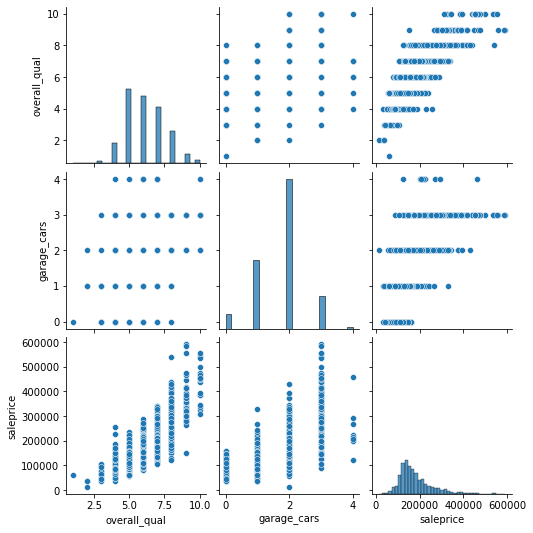

In [28]:
# Linearity:
sns.pairplot(pd.merge(X_train_df[['overall_qual', 'garage_cars']], y_train, left_index = True, right_index = True));

In [29]:
# Independence of Errors:
# True by assumption

In [61]:
test_preds.shape

(591,)

In [59]:
train_preds.shape

(1378,)

In [63]:
y_train.shape

(1378,)

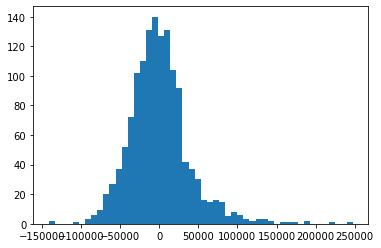

In [30]:
# Normality:
resids = y_train - train_preds 
plt.hist(resids, bins=50);

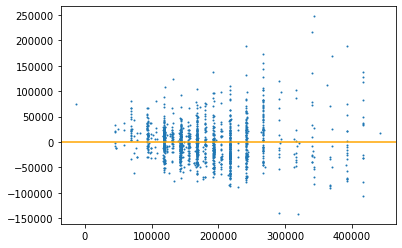

In [31]:
# Equality of Variances:
plt.scatter(train_preds, resids, s=1)
plt.axhline(0, color="orange");

<ipython-input-32-00d94105660e>:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(train_preds), resids, s=1)


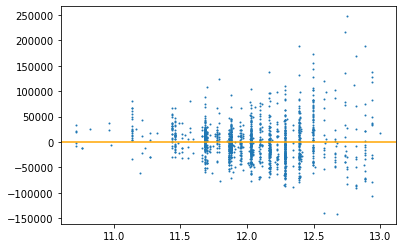

In [32]:
# Lets try a log transformation to see if the hint of heteroscedasitity disappears
plt.scatter(np.log(train_preds), resids, s=1)
plt.axhline(0, color="orange");

Log transformation makes heteroscedasitity worse!

In [33]:
# Independence of Predictors:
X_train_df.corr()

,overall_qual,garage_cars,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
overall_qual,1.000000,0.597680,-0.123628,0.527310,-0.663044,-0.185946,0.411273,-0.569250
garage_cars,0.597680,1.000000,-0.099199,0.399725,-0.472712,-0.175824,0.307924,-0.393000
exter_qual_Fa,-0.123628,-0.099199,1.000000,-0.069774,-0.122446,0.184312,-0.064732,0.005243
exter_qual_Gd,0.527310,0.399725,-0.069774,1.000000,-0.895753,-0.110241,0.652209,-0.629823
exter_qual_TA,-0.663044,-0.472712,-0.122446,-0.895753,1.000000,0.083504,-0.583791,0.697060
kitchen_qual_Fa,-0.185946,-0.175824,0.184312,-0.110241,0.083504,1.000000,-0.126485,-0.157935
kitchen_qual_Gd,0.411273,0.307924,-0.064732,0.652209,-0.583791,-0.126485,1.000000,-0.839005
kitchen_qual_TA,-0.569250,-0.393000,0.005243,-0.629823,0.697060,-0.157935,-0.839005,1.000000


Nothing seems too correlated to be removed.

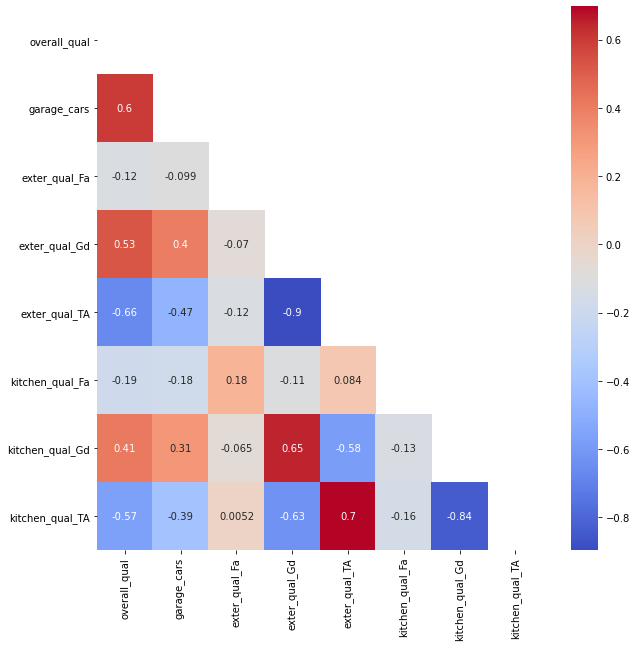

In [35]:
mask = np.zeros_like(X_train_df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    X_train_df.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);

## Ridge model:

In [42]:
# Ridge regressor lives here:
from sklearn.linear_model import Ridge, RidgeCV

Standarizing removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

"fit_transform()" is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. These learned parameters are then used to scale our test data.

In [43]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [44]:
#Instantiate
ridge_model = Ridge(alpha=10)

#Fit
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge_model.score(Z_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge_model.score(Z_test, y_test)}")

Ridge Training R-Squared: 0.7564103768227897
Ridge Testing R-Squared: 0.7344208776905439


In [45]:
# optimal alpha:

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

12.91549665014884

In [46]:
ridge_opt = Ridge(alpha=ridge_cv.alpha_)
ridge_opt.fit(Z_train, y_train)

print(f"Train score: {ridge_opt.score(Z_train, y_train)}")
print(f"Test score: {ridge_opt.score(Z_test, y_test)}")

Train score: 0.7562986073243841
Test score: 0.7342853598304995


In [47]:
ridge_opt.coef_

array([ 33433.62106765,  19633.38944786,  -7409.88689607, -22797.00301278,
       -30041.02698578,  -7966.57861235, -23075.34859826, -29182.51843258])

### Lasso:

In [77]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV

In [78]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=2, max_iter=50_000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

In [79]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.001

In [80]:
print(f"LASSO Training R-Squared: {lasso_cv.score(Z_train, y_train)} ")
print(f"LASSO Testing R-Squared: {lasso_cv.score(Z_test, y_test)} ")

LASSO Training R-Squared: 0.7483374575441439 
LASSO Testing R-Squared: 0.7234559449077447 


In [81]:
# Reminders
print(" MLR ".center(18, "="))
print(lr.score(Z_train, y_train))
print(lr.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
print()
print(" Lasso ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))


====== MLR =======
0.7483374575441504
0.7234559313974515

===== Ridge ======
0.7481362432556091
0.7255260041188147

===== Lasso ======
0.7483374575441439
0.7234559449077447


In [83]:
print('MLR difference =', 0.7483374575441504 - 0.7234559313974515)
print('Ridge difference =', 0.748136243255609 - 0.7255260041188147)
print('Lasso difference =', 0.7483374575441439 - 0.7234559449077447)

MLR difference = 0.024881526146698918
Ridge difference = 0.022610239136794275
Lasso difference = 0.02488151263639926


#### Ridge is the best model option because it's the most accurate regarding a train/test ratio.

# Creating Kaggle test csv

In [84]:
kaggle_sub_data = pd.read_csv('../datasets/test.csv')

In [85]:
#tenemos que cambiar las columns del kaggle
kaggle_sub_data.columns = [column.replace(' ', '_').lower() for column in kaggle_sub_data.columns]

In [87]:
kaggle_sub_data_dummy = pd.get_dummies(kaggle_sub_data, columns = ['exter_qual', 'kitchen_qual'], drop_first = True)

In [88]:
#generate predictions

kaggle_preds = ridge_opt.predict(kaggle_sub_data_dummy[X_train.columns])

In [89]:
kaggle_sub_data_dummy
#we are missing our saleprice

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,4,2006,WD,0,0,1,1,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,8,2006,WD,0,0,1,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,9,2006,New,0,1,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,7,2007,WD,0,1,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,7,2009,WD,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,11,2007,WD,0,0,1,0,0,0,1
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,8,2008,WD,0,1,0,0,1,0,0
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,8,2008,WD,0,0,1,0,0,0,1
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,5,2007,WD,0,0,1,0,0,0,1


In [90]:
# we need to add saleprice

kaggle_sub_data_dummy['saleprice'] = kaggle_preds

In [91]:
# solo quiero id y salerice para kaggle
kaggle_sub_data_dummy[['id', 'saleprice']]

,id,saleprice
0,2658,360715.361205
1,2718,323431.297286
2,2414,402759.862132
3,1989,330244.640032
4,625,356141.474065
...,...,...
873,1662,356141.474065
874,1234,370049.685352
875,1373,303328.381478
876,1672,290721.120506


In [94]:
# ahora lo paso a un csv
kaggle_sub_data_dummy[['id', 'saleprice']].to_csv('../datasets/kaggle_1stModel_sub.csv', index = False)